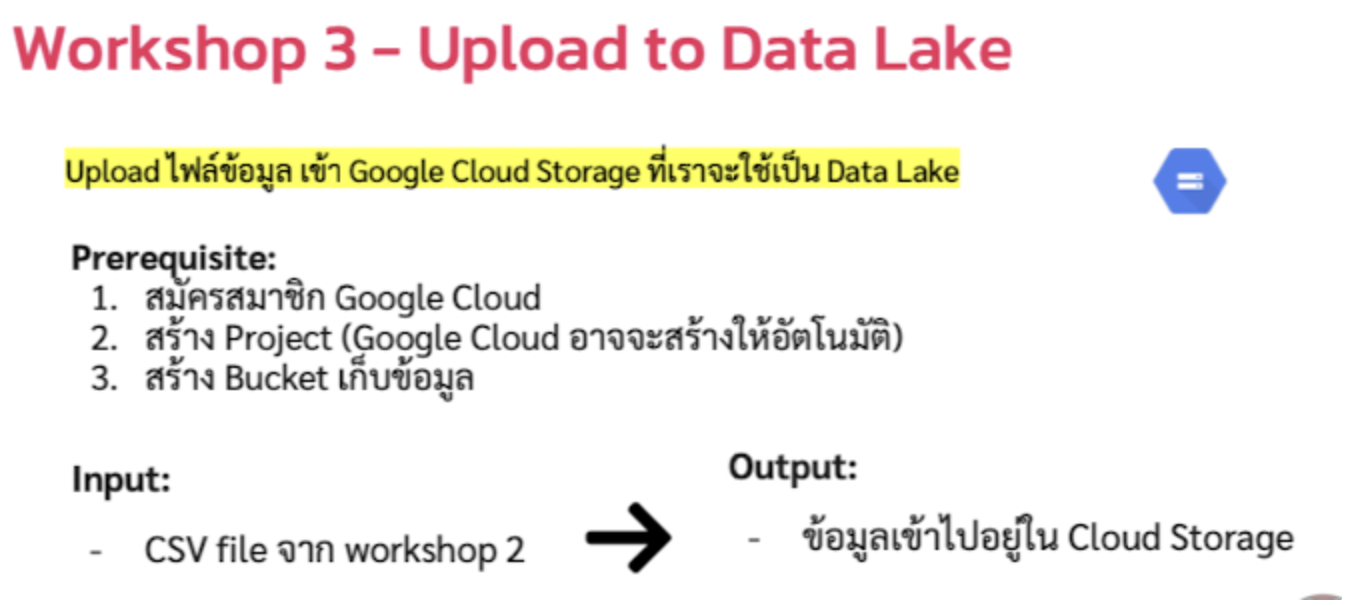

สร้าง bucket ผ่าน cloud shell

`gsutil mb gs://[BUCKET_NAME]`

Upload Data

- download file to cloudshell`wget -O data.zip [https://file.designil.com/bhXYol+](https://file.designil.com/bhXYol+)`
- `unzip data.zip`
- `gsutil cp [File] gs://[BUCKET]` Copy (upload) file to bucket
    - `gsutil cp ws2-output.csv gs://patlee-data-lake`

In [ ]:
#upload Data via python

from google.cloud import storage

def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"

    # The ID of your GCS object
    # source_blob_name = "storage-object-name"

    # The path to which the file should be downloaded
    # destination_file_name = "local/path/to/file"

    storage_client = storage.Client()

    bucket = storage_client.bucket(bucket_name)

    # Construct a client side representation of a blob.
    # Note `Bucket.blob` differs from `Bucket.get_blob` as it doesn't retrieve
    # any content from Google Cloud Storage. As we don't need additional data,
    # using `Bucket.blob` is preferred here.
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)

    print(
        "Downloaded storage object {} from bucket {} to local file {}.".format(
            source_blob_name, bucket_name, destination_file_name
        )
    )


def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    blob.upload_from_filename(source_file_name)

    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

if __name__ == "__main__":
    upload = input("upload(u) or download(d) ?")
    local_name = input("What's local name upload:")
    gcs_file_name = input("What's gcs file name:")

    if upload.lower() == "u" or upload.lower() == "upload":
        upload_blob( 
                bucket_name = "patlee-data-lake",
                source_file_name = local_name,
                destination_blob_name = gcs_file_name                    
            )
    elif upload.lower() == "d" or upload.lower() == "download":
        upload_blob( 
                bucket_name = "patlee-data-lake",
                source_blob_name = gcs_file_name,
                destination_file_name = local_name                    
            )
    else:
        print ("Please select upload(u) or download(d)")